# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd

student_data = pd.DataFrame({
    'x' : [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], # the INDEPENDENT variable, the Ages
    'y' : [10, 1, 5, 9, 4, 2, 9, 6, 0, 3], # the DEPENDENT varible, the number of Tardies
})

student_data

,x,y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [2]:
# Your code here.
student_data.plot(
    x = 'x',
    y = 'y',
    kind = 'scatter'
)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
# I do see a trend, I see a negative, apparently linear correlation between Age and Number of Tardies.
# As Age of Student increases, the number of Tardies decreases.
# Put simply, older students are less likely to be Tardy.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.

import numpy as np

co_var = np.cov(
    student_data['x'], # x values
    y = student_data['y'], # y values 
)

co_var

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
from sklearn import linear_model

x_val = np.array(student_data['x']).reshape(-1, 1)
y_val = student_data['y']


regr = linear_model.LinearRegression() # initialize a Session, an Instance 
regr.fit(x_val, y_val) # returns an Object, a linear regression Model, and we have fit a linear regression line to this data

# My outcome variable will be an Object, a model to help predict Y, the Expected number of Tardies
# I am using Linear Regression with only a single 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot your regression model on your scatter plot.

My Line of best fit is Y = [-0.24282077]x + 12.888803363135768


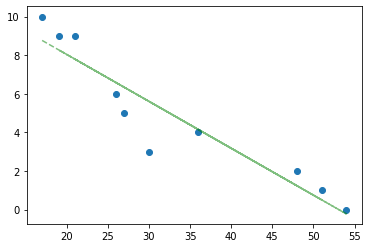

In [6]:
# Your code here.

import matplotlib.pyplot as plt

intercept = regr.intercept_ # don't forget the UNDERSCORE! identify the .intercept Attribute from the linear_model.LinearRegression session you created earlier

x_slope = regr.coef_
print(f"My Line of best fit is Y = {x_slope}x + {intercept}")

plt.scatter(x_val, y_val) # show my actual data
plt.plot( # show my regression model
    x_val, # x values
    [intercept + (x_slope * x) for x in x_val], # y values, creating the line
    color = 'green',
    linestyle = '--', # a dotted line, you can abbreviate linestyle to just lowercase(LS)
    alpha = 0.5, # opacity
)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Your response here. 
regr.score(x_val, y_val) # returns 0.88, that is my R-Squared value, showing that my LinearRegression Model is a strong fit for the data. This is the proportion of variation in the the Age vs. Tardy data that my model is able to capture. Based on this, we can definitely say that according to this data, age is a strong predictor of tardiness. Based on the linear correlation, we can say it is a NEGATIVE correlation - as Age Increases, the Number of Tardies decreases.

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np

vehicles = pd.read_csv('vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Your response here. 
# first i'll need to subset my dataframe to just these columns. then I can use the .corr() method on my df

cars = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# cars.head()

cars.corrwith(cars['CO2 Emission Grams/Mile']).sort_values(ascending = False)
# Fuel Barrels/Year and Fuel Cost/Year and Cylinders are strong indicators for a positive correlation, and Combined MPG is a strong indicator for a negative correlation. The least helpful indicator would be Year, since it is very weakly correlated.

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here. 
from sklearn import linear_model

regr = linear_model.LinearRegression() # initalize my LinearRegression Instance

X = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']] # the input variables, capital X to represent multiple columns of data
y = cars['CO2 Emission Grams/Mile'] # the output variable

regr.fit(X, y)

intercept = regr.intercept_
year_slope, cylinders_slope, fuel_barrels_per_year_slope, combined_MPG_slope, fuel_cost_per_year_slope = regr.coef_

intercept, year_slope, cylinders_slope, fuel_barrels_per_year_slope, combined_MPG_slope, fuel_cost_per_year_slope
# I am using linear, Multivariate Regression

(769.8882836465802,
 -0.3206167315187535,
 1.8787997557942495,
 19.052925065031534,
 -3.0403993802127935,
 0.03230947894138551)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [11]:
# Your response here. 
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
results.summary()

# the most important variables in my model are 
# the regression summary also indicates a very high Condition number, which tells me that there are multiple strong linear correlation variables among the data.
# My model gives a 0.999 R-squared value, so I am extremely confident that my model captures any variation in my data.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Thu, 14 Nov 2019   Prob (F-statistic):                        0.00
Time:                             21:02:24   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [12]:
# Your code here. 

party = pd.DataFrame({
    'x' : [1, 3, 4 ,6, 8, 9, 11, 14], # number of people invited
    'y' : [1, 2, 4, 4, 5, 7, 8, 13], # number of people attended
})

party

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

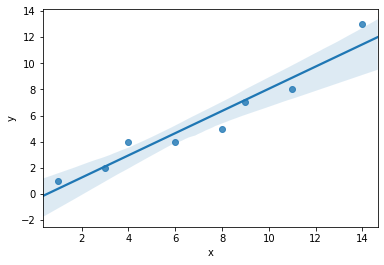

In [13]:
# Your code here.

import seaborn as sns

sns.regplot(
    x = 'x',
    y = 'y',
    data = party
)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [14]:
# Your response here. 
# I see what appears to be a moderately strong positive correlation between the variables, although I have three data points outside of the shaded area.

from scipy.stats import linregress 

slope, intercept, r_squared, p_value, std_err = linregress( # spits back a tuple with all of those values
    party['x'],
    party['y'],
)

slope, intercept, r_squared, p_value, std_err

(0.8484848484848485,
 -0.43939393939393945,
 0.9652303546573691,
 0.00010236374464090686,
 0.09380896778286217)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

0.7352941176470588 -0.011764705882352011 0.9941320562302279 0.0005391134182578607 0.046193015644666366


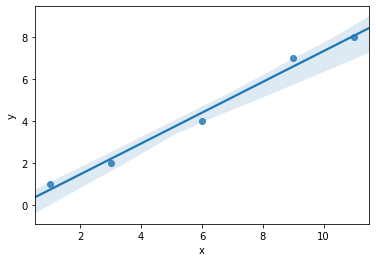

In [15]:
# Your response here. 

party2 = pd.DataFrame({
    'x' : [1, 3 ,6, 9, 11],
    'y' : [1, 2, 4, 7, 8],
})

slope, intercept, r_squared, p_value, std_err = linregress( # spits back a tuple with all of those values
    party2['x'],
    party2['y'],
)

print(slope, intercept, r_squared, p_value, std_err)

sns.regplot(
    x = 'x',
    y = 'y',
    data = party2,
)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [16]:
# Your response here. 

# Without these outliers, my data is a much tighter line-of-best-fit. The r-squared value after removing those outliers is 0.994, while the original was 0.96. my slope and y-intercept changed what would initiallly look like a small amount, but actually had a large effect on the line. 